<h1>EDA with python and logistic regression</h1> 
We will use the titanic data set from Kaggle

The classification we will do is alive/deceased

<h2>Import libraries</h2>

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [117]:
#let's get the data set
train=pd.read_csv('titanic.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>First we need to find the missing data</h2>

In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

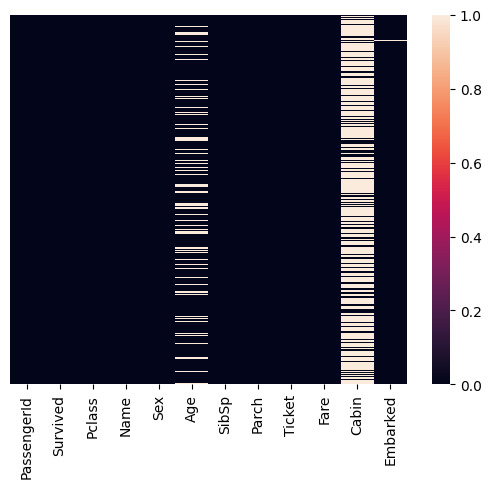

In [13]:
#to visualize the data
# here all null values are shown in the lines
sns.heatmap(train.isnull(),yticklabels=False)

Now we can see that approximately 20% of the age data is missing, which is not a big problem

However, lots of data of cabin is missing, so we may reformulate this feature like "cabin known:1/0" or just drop it

<Axes: xlabel='Survived', ylabel='count'>

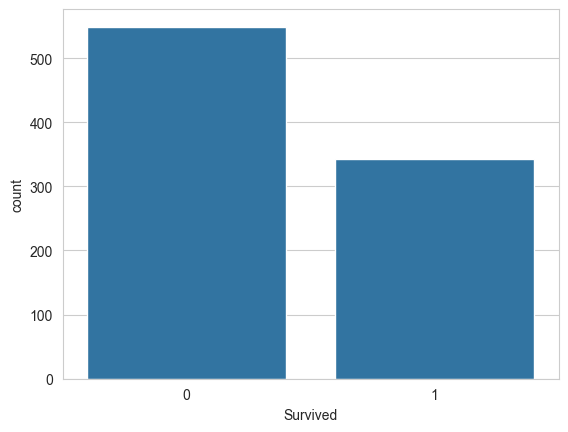

In [17]:
#let's see how many people survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

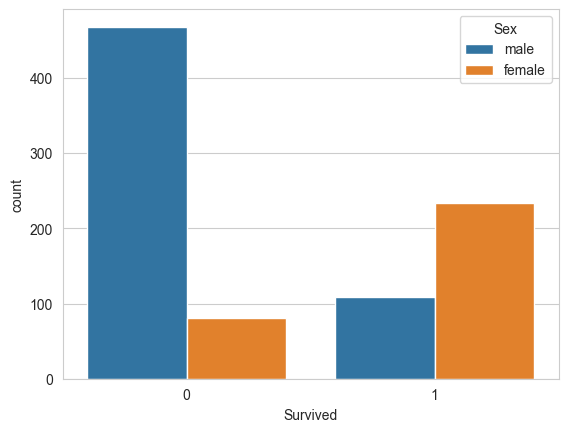

In [22]:
#let's see what is the relation with the sex parameter 
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train)

<Axes: xlabel='Survived', ylabel='count'>

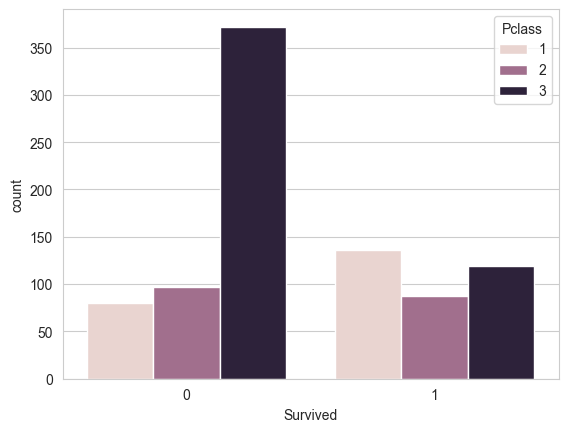

In [23]:
#let's see what is the relation with the Pclass paramter
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train)

/var/folders/b4/z7jkns1j31z1y55dz2qp749w0000gn/T/ipykernel_82053/922731524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False)


<Axes: xlabel='Age'>

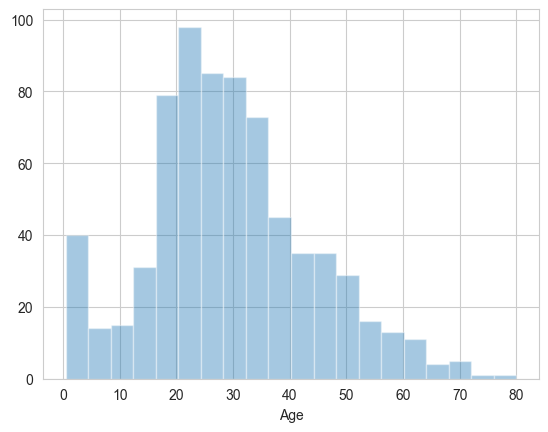

In [24]:
sns.distplot(train['Age'].dropna(),kde=False)

<Axes: >

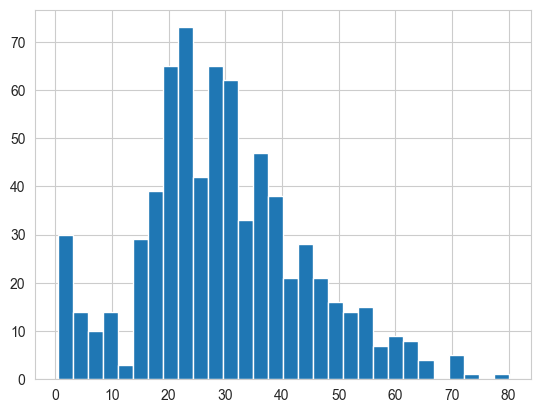

In [26]:
# we can also do this 
train['Age'].hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

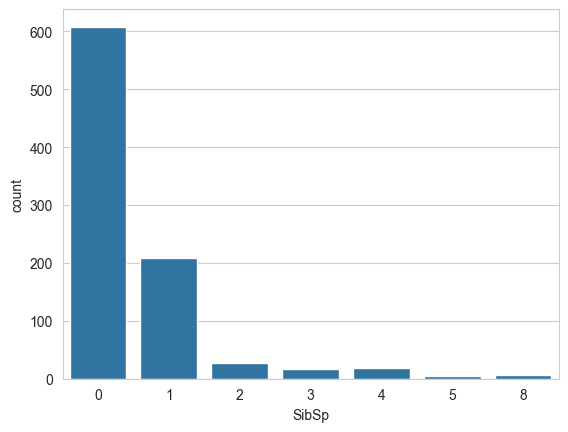

In [27]:
# now let's see the nb of people that had a sibling or spouse
sns.countplot(data=train,x='SibSp')

<h1>Data cleaning</h1>
Now we have to remove some values

<Axes: xlabel='Pclass', ylabel='Age'>

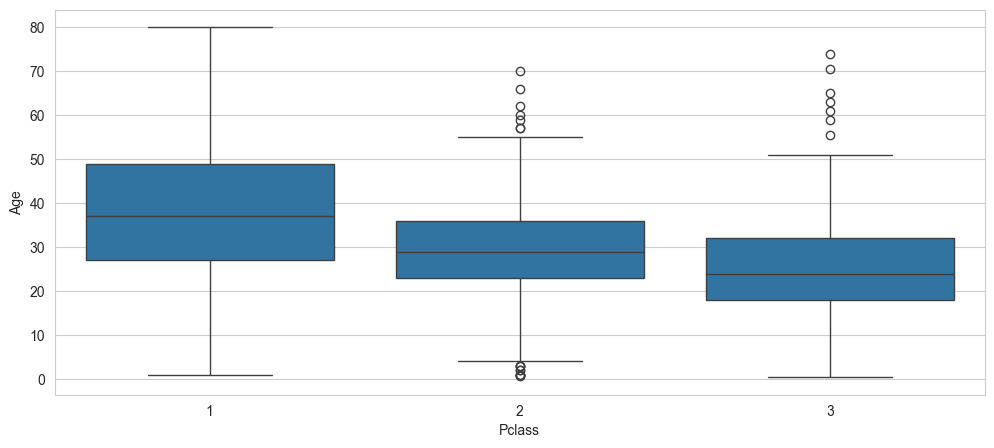

In [36]:
# we want to eliminate 'Age'
# we find that there is a relation between age and the Pclass
# we are trying to find the average age for each passanger class
plt.figure(figsize=(12,5))
sns.boxplot(x='Pclass',y='Age',data=train)

In [104]:
#we see that the average age for class 1 is 37 years old, 29 for 2 and 24 for 3
#thus we can make a function to replace the missing age values with these averages

def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    


In [118]:
# now apply the function
train["Age"]=train[['Age','Pclass']].apply(input_age, axis=1)

/var/folders/b4/z7jkns1j31z1y55dz2qp749w0000gn/T/ipykernel_82053/895388720.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/var/folders/b4/z7jkns1j31z1y55dz2qp749w0000gn/T/ipykernel_82053/895388720.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

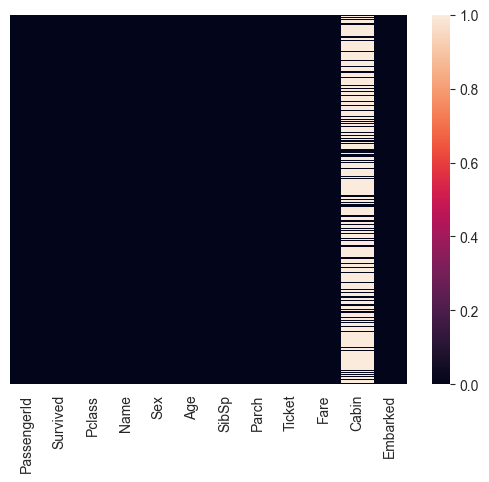

In [55]:
#check if it works
sns.heatmap(train.isnull(),yticklabels=False)

In [119]:
#now we can drop the 'cabin' column
train.drop('Cabin',axis=1,inplace=True)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

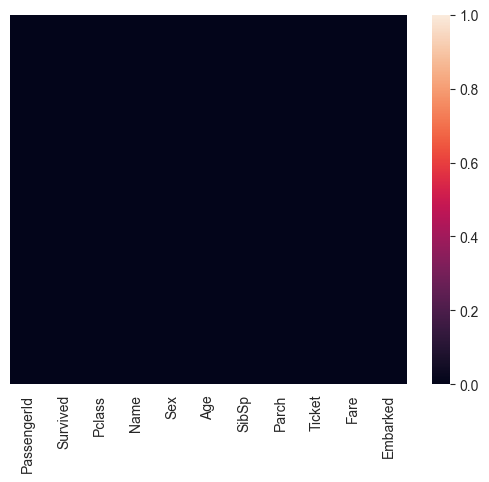

In [57]:
#now we can recheck
sns.heatmap(train.isnull(),yticklabels=False)

In [120]:
train.dropna(inplace=True)

<h2>Converting to ints</h2>
We have some cattegories that we can replace with ints, for ex sex and 'embarked'

In [121]:
pd.get_dummies(train['Embarked'],drop_first=True,dtype=int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [123]:
#now we convert sex and embark to dummy variable
sex=pd.get_dummies(train["Sex"], drop_first=True,dtype=int)
embarked=pd.get_dummies(train['Embarked'],drop_first=True,dtype=int)

In [124]:
#now we drop these 2 and 2 other cattegories that don't help us
train.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [125]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [116]:
#now we add the dummy int values
train=pd.concat([train,sex,embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


<h1>Building the regression model</h1>

<h3>Train test split</h3>

In [126]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [127]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),
                                               train['Survived'],
                                               test_size=0.30,
                                               random_state=101)

<h2>Training and predicting</h2>

In [130]:
from sklearn.linear_model import LogisticRegression


In [131]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [132]:
predictions=logmodel.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
accuracy=confusion_matrix(y_test,predictions)

In [135]:
accuracy

array([[142,  21],
       [ 53,  51]])

In [136]:
from sklearn.metrics import accuracy_score


In [138]:
accuracy1=accuracy_score(y_test,predictions)
accuracy1

0.7228464419475655

In [139]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])